In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import autocorrelation_plot

In [3]:
# read the dataset into a dataframe
df = pd.read_csv(r'E:\bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv\bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Here I start cleaning the data. Firstly, converting Timestamp to datetime64
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')
# sets the index as the date
df.index = df.Timestamp
# Resamples the data to the average daily value of each column. Removes excessive frequency
df = df.resample('D').mean()
# drops any missing values that are present
df = df.dropna()
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,,
2011-12-31,2011-12-31 15:55:30,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,2012-01-01 11:59:30,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,2012-01-02 11:59:30,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-03,2012-01-03 11:59:30,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-04,2012-01-04 11:59:30,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159


In [5]:
print(df.shape)

(3376, 8)


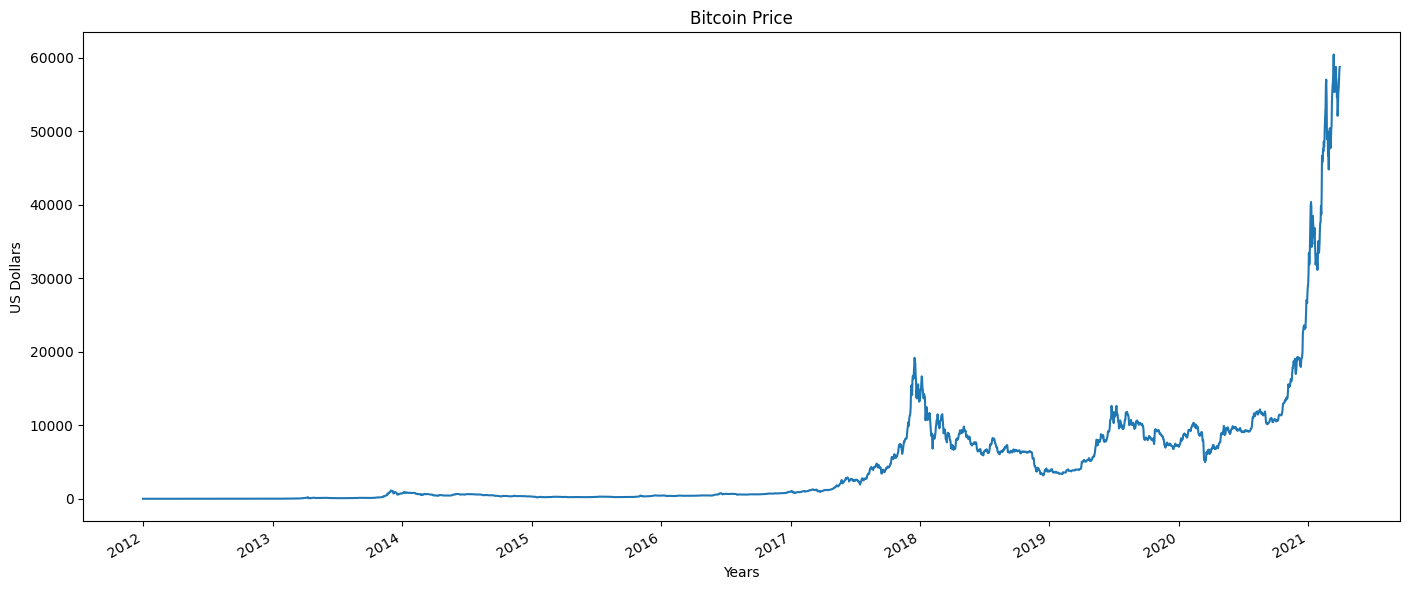

In [6]:
df.Weighted_Price.plot(title = "Bitcoin Price", figsize=(14,6))
plt.tight_layout()
plt.xlabel('Years')
plt.ylabel('US Dollars')
plt.show()

Text(0.5, 1.0, 'Autocorrelation Plot')

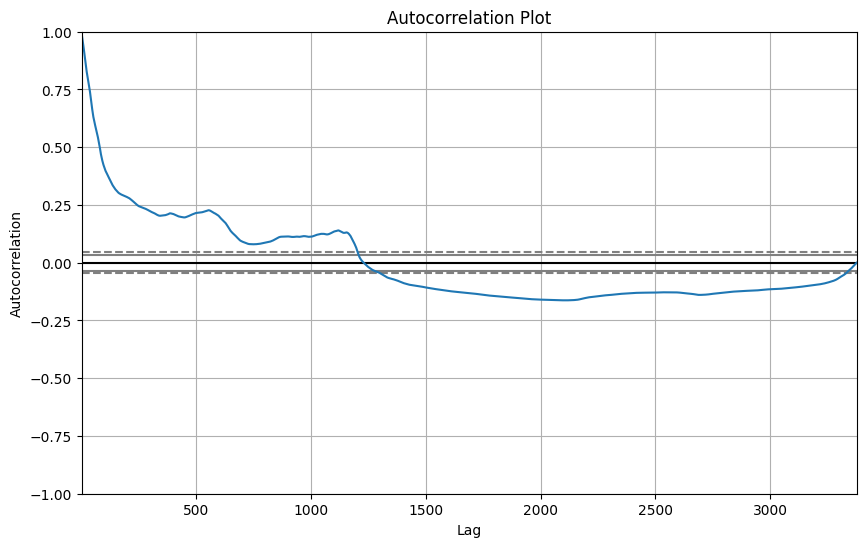

In [12]:


# Assuming 'Timestamp' is the time index of your DataFrame (change it to your actual time index)
# Ensure it is in a valid format and sorted properly.
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

# Plot the autocorrelation using pandas' autocorrelation_plot() function
plt.figure(figsize=(10, 6))
pd.plotting.autocorrelation_plot(df['Weighted_Price'])
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')


In [10]:
# Since the first couple years of bitcoin don't properly represent the movement and volatility of the price -
# I decide to simply focus on the previous 4 years of data from March 31st, 2021.
df2 = pd.read_csv(r'E:\bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv\bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
df2.Timestamp = pd.to_datetime(df2.Timestamp, unit='s')
df2.index = df2.Timestamp
df2 = df2.resample('D').mean()
df2 = df2.dropna()
# changes data to strictly to the previous 4 years, which is March 2017 to March 2021
df2 = df2.iloc[(-365*4):]
print(df2.shape)

(1460, 8)


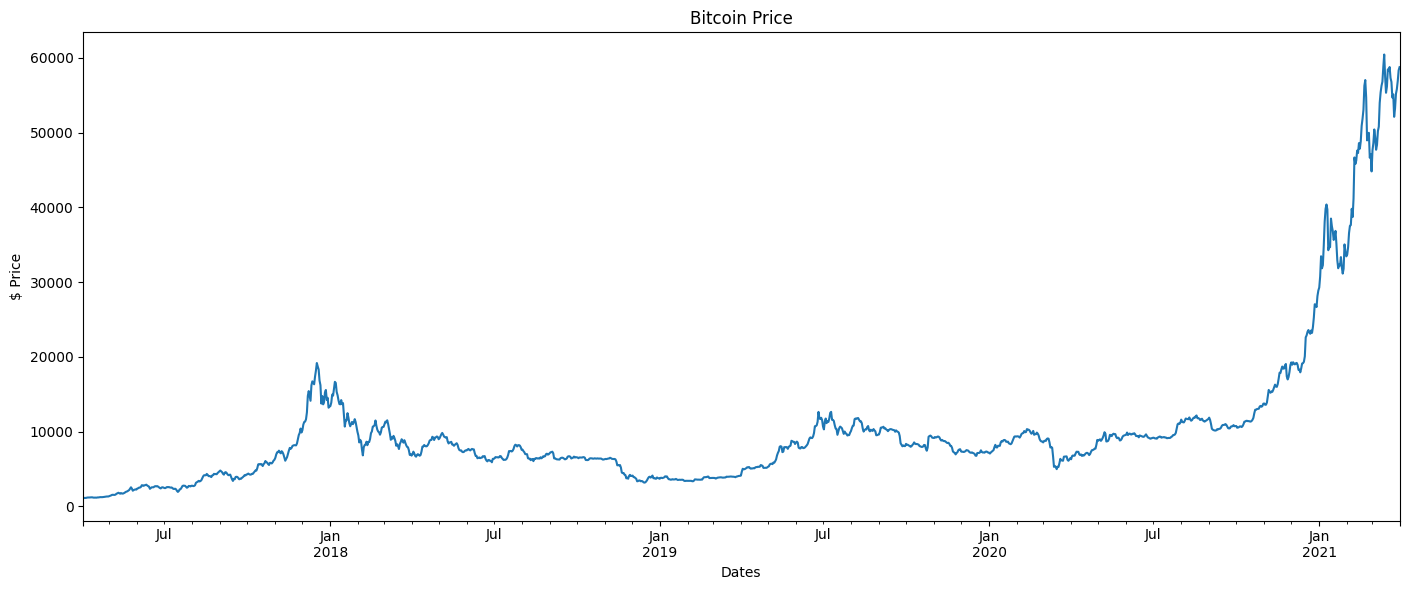

In [11]:
df2.Weighted_Price.plot(title = "Bitcoin Price", figsize=(14,6))
plt.tight_layout()
plt.xlabel('Dates')
plt.ylabel('$ Price')
plt.show()


#  Roling Forecast ARIMA

In [16]:
from statsmodels.tsa.arima.model import ARIMA
# We're going to create a dataframe for just the price (the index is still the date)
price = df2.Weighted_Price
# Next we're going to assign 70% percent of the data to training and 30% for testing
X = price.values
size = int(len(X) * 0.7)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

predicted=8906.555129, expected=8891.817032
predicted=8895.328203, expected=8847.166822
predicted=8823.251554, expected=8644.708000
predicted=8614.893753, expected=8646.193567
predicted=8644.601377, expected=8665.685486
predicted=8673.025509, expected=8435.602730
predicted=8381.269853, expected=8383.325487
predicted=8379.370156, expected=8321.535236
predicted=8318.304734, expected=8430.129200
predicted=8440.974688, expected=8723.535467
predicted=8788.062102, expected=9041.676236
predicted=9098.966409, expected=9331.033358
predicted=9385.485455, expected=9370.896512
predicted=9378.727824, expected=9342.279203
predicted=9332.933525, expected=9372.449066
predicted=9381.325259, expected=9377.036114
predicted=9371.465575, expected=9330.400381
predicted=9317.339161, expected=9202.938405
predicted=9179.993413, expected=9403.167151
predicted=9443.891367, expected=9689.417025
predicted=9747.915222, expected=9776.736693
predicted=9781.744766, expected=9813.044906
predicted=9824.520238, expected=

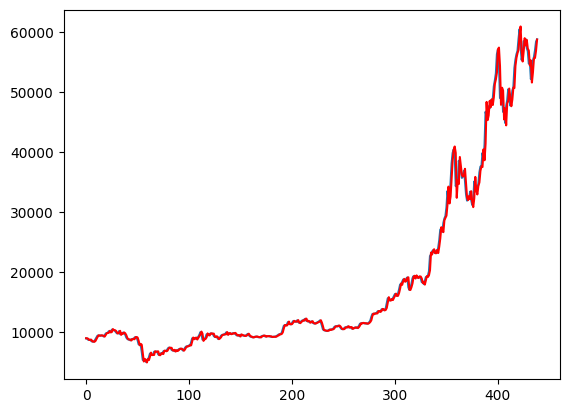

In [17]:
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Test RMSE: 916.320


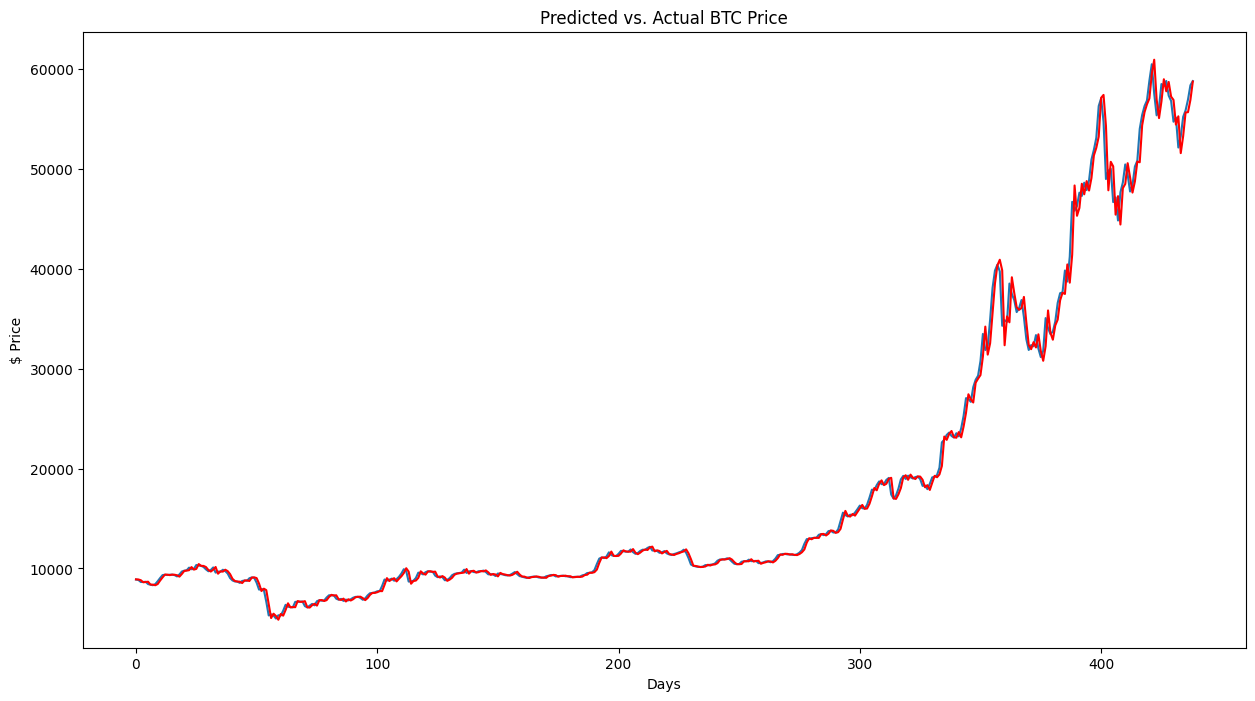

In [18]:
plt.figure(figsize=(15,8))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.xlabel('Days')
plt.ylabel('$ Price')
plt.title('Predicted vs. Actual BTC Price')
plt.show()

Test RMSE: 916.320


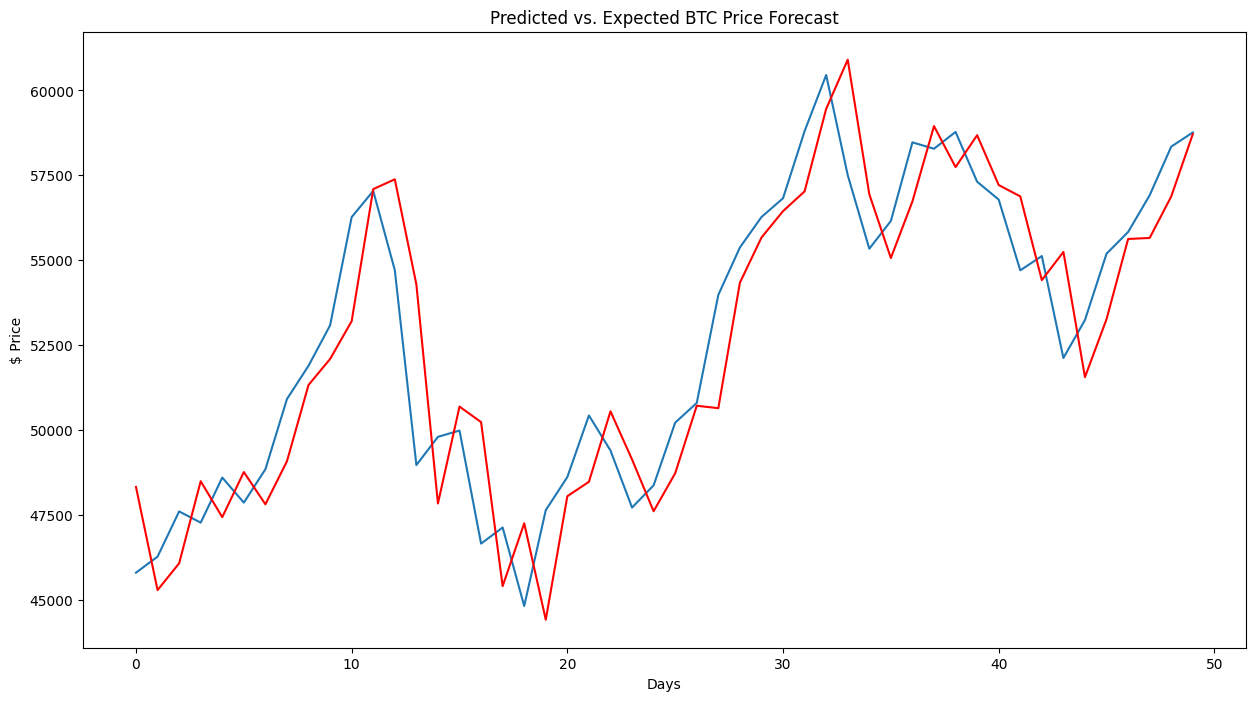

In [19]:
plt.figure(figsize=(15,8))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test[-50:])
plt.plot(predictions[-50:], color='red')
plt.xlabel('Days')
plt.ylabel('$ Price')
plt.title('Predicted vs. Expected BTC Price Forecast')
plt.show()

# ARIMA

In [71]:
from statsmodels.tsa.arima.model import ARIMA
# method to be used later
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i-interval]
        diff.append(value)
    return np.array(diff)

def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [72]:
# Split the data as usual 70, 30
price = df2.Weighted_Price
X = price.values
datesX = price.index
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
days_in_year = 365
plotDates = datesX[size:len(X)]

# Next we will forecast with ARIMA using 5,1,0
differenced = difference(train, days_in_year)
model = ARIMA(differenced, order=(5, 1, 0))
model_fit = model.fit()
start_index = len(differenced)
end_index = start_index + 438
forecast = model_fit.predict(start=start_index, end=end_index)

history = [x for x in train]
day = 1
predicted_results = list()

# store predicted results 
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_in_year)
    print("Predicted Day %d: %f" % (day, inverted))
    history.append(inverted)
    predicted_results.append(inverted)
    day += 1

Predicted Day 1: 8928.819293
Predicted Day 2: 9005.491918
Predicted Day 3: 8925.202349
Predicted Day 4: 8870.390200
Predicted Day 5: 8888.300203
Predicted Day 6: 8905.320798
Predicted Day 7: 8889.998435
Predicted Day 8: 8892.542453
Predicted Day 9: 8907.824940
Predicted Day 10: 8880.738216
Predicted Day 11: 8772.950845
Predicted Day 12: 8733.925478
Predicted Day 13: 8760.065899
Predicted Day 14: 8760.331642
Predicted Day 15: 8752.631594
Predicted Day 16: 8768.137410
Predicted Day 17: 8760.863443
Predicted Day 18: 8749.977875
Predicted Day 19: 8755.357324
Predicted Day 20: 8707.316872
Predicted Day 21: 8702.217340
Predicted Day 22: 8791.842423
Predicted Day 23: 8950.890368
Predicted Day 24: 8943.894674
Predicted Day 25: 8931.173712
Predicted Day 26: 8913.913360
Predicted Day 27: 8918.013122
Predicted Day 28: 8904.860938
Predicted Day 29: 8906.483751
Predicted Day 30: 8923.714424
Predicted Day 31: 8921.326720
Predicted Day 32: 9092.712919
Predicted Day 33: 9236.771259
Predicted Day 34: 9

In [73]:
rmse = np.sqrt(mean_squared_error(test, predicted_results))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 15171.040


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  656
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4862.501
Date:                Thu, 20 Jul 2023   AIC                           9737.002
Time:                        11:02:54   BIC                           9763.910
Sample:                             0   HQIC                          9747.435
                                - 656                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2172      0.027      7.963      0.000       0.164       0.271
ar.L2          0.0235      0.023      1.039      0.299      -0.021       0.068
ar.L3         -0.0283      0.030     -0.940      0.3

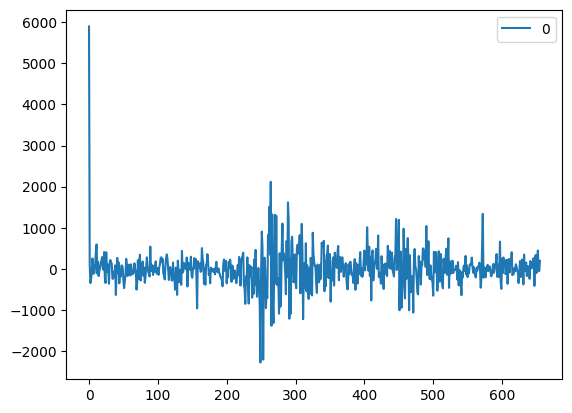

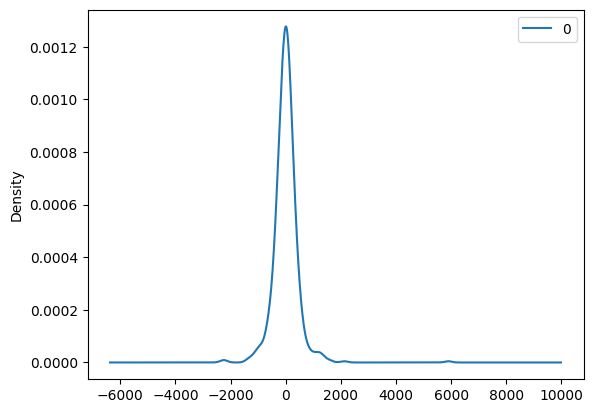

                 0
count   656.000000
mean      7.998684
std     466.169414
min   -2280.040333
25%    -196.248626
50%       8.188489
75%     194.169243
max    5897.069100


In [74]:
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

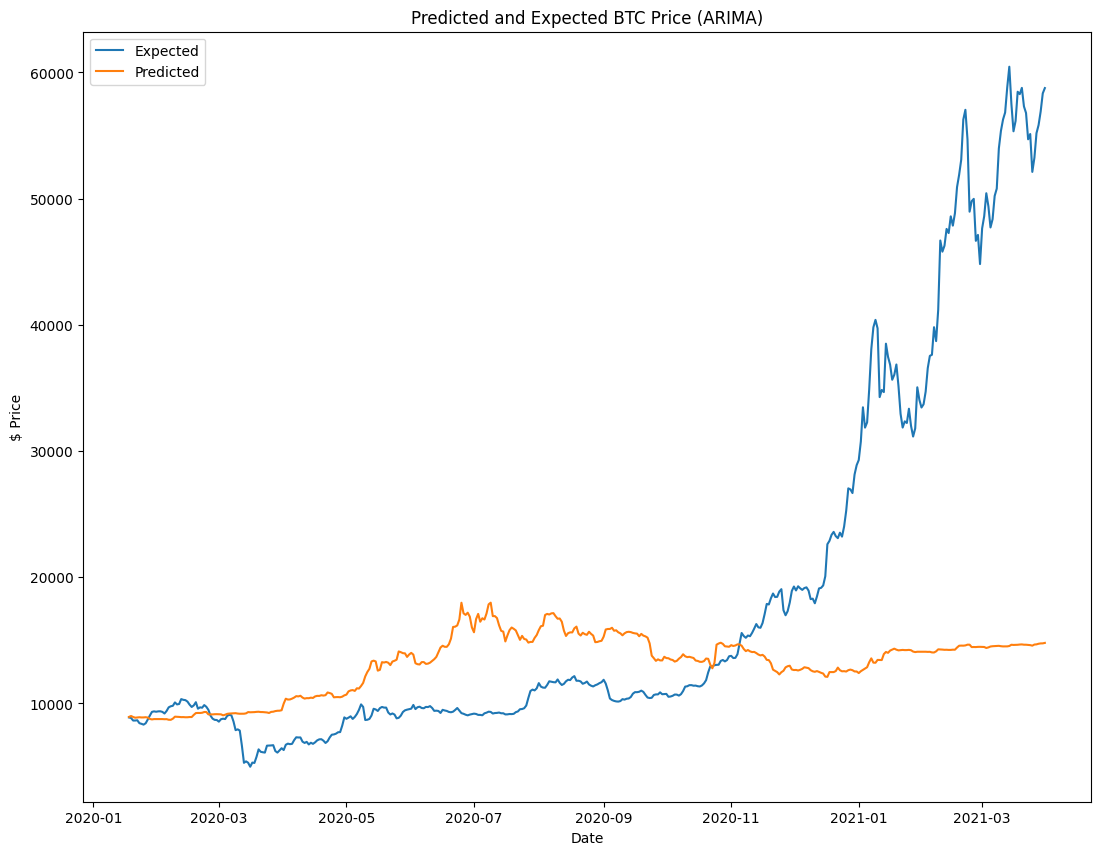

In [75]:
plt.figure(figsize=(13,10))
plt.plot(plotDates, test, label='Expected')
plt.plot(plotDates, predicted_results, label='Predicted')
plt.ylabel('$ Price')
plt.xlabel('Date')
plt.legend(loc='best')
plt.title('Predicted and Expected BTC Price (ARIMA)')
plt.show()

# LSTM

In [20]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, Dropout,Flatten
from tensorflow.keras import Sequential
from statsmodels.graphics.tsaplots import plot_acf

In [21]:
price = df2.Weighted_Price
# As usual split data, 70, 30
X = price
size = int(len(X) * 0.7)
train_df, test_df = X[0:size], X[size:len(X)]
training_values = train_df.values
training_values = np.reshape(training_values, (len(training_values), 1))

# Scale the data using minMaxScaler
scaler = MinMaxScaler()
training_values = scaler.fit_transform(training_values)
# assign training values
x_train = training_values[0: len(training_values)-1]
y_train = training_values[1: len(training_values)]
x_train = np.reshape(x_train, (len(x_train), 1, 1))

In [22]:
model = Sequential()
model.add(LSTM(10,input_shape = (None,1), activation="relu", return_sequences=True))
model.add(Dense(1))

In [23]:
model.compile(loss="mean_squared_error",optimizer="adam")

In [24]:
model.fit(x_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
32/32 [==============================] - 1s 1ms/step - loss: 0.1330
Epoch 2/50
32/32 [==============================] - 0s 985us/step - loss: 0.1026
Epoch 3/50
32/32 [==============================] - 0s 959us/step - loss: 0.0798
Epoch 4/50
32/32 [==============================] - 0s 959us/step - loss: 0.0622
Epoch 5/50
32/32 [==============================] - 0s 926us/step - loss: 0.0482
Epoch 6/50
32/32 [==============================] - 0s 962us/step - loss: 0.0370
Epoch 7/50
32/32 [==============================] - 0s 926us/step - loss: 0.0291
Epoch 8/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0240
Epoch 9/50
32/32 [==============================] - 0s 959us/step - loss: 0.0211
Epoch 10/50
32/32 [==============================] - 0s 929us/step - loss: 0.0196
Epoch 11/50
32/32 [==============================] - 0s 926us/step - loss: 0.0186
Epoch 12/50
32/32 [==============================] - 0s 957us/step - loss: 0.0177
Epoch 13/50
32/32 [==========

In [25]:
# assign test and predicted values + reshaping + converting back from scaler
test_values = test_df.values
test_values = np.reshape(test_values, (len(test_values), 1))
test_values = scaler.transform(test_values)
test_values = np.reshape(test_values, (len(test_values), 1, 1))
predicted_price = model.predict(test_values)
predicted_price = np.reshape(predicted_price, (len(predicted_price), 1))
predicted_price = scaler.inverse_transform(predicted_price)

14/14 [==============================] - 0s 576us/step


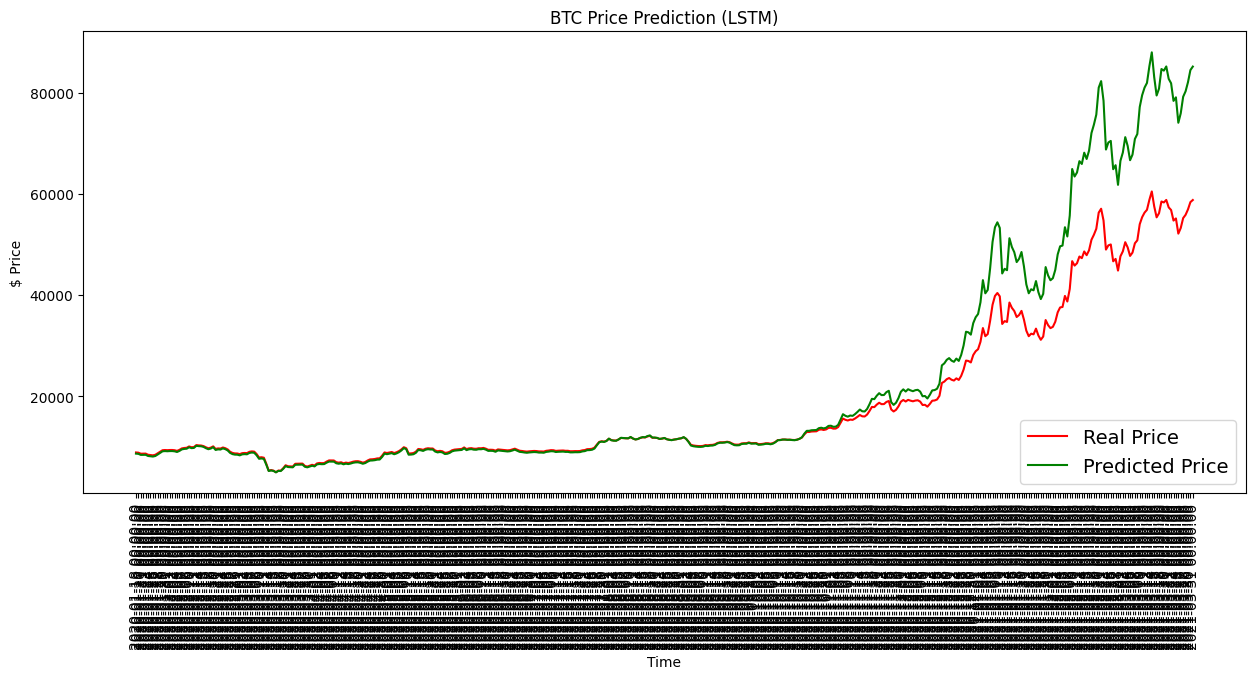

In [26]:
# plotting the results
plt.figure(figsize=(15, 6))
ax = plt.gca()  
plt.plot(test_df.values, color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Price')
plt.title('BTC Price Prediction (LSTM)')
test_df = test_df.reset_index()
x= test_df.index
labels = test_df['Timestamp']
plt.xticks(x, labels, rotation = 'vertical')
plt.xlabel('Time')
plt.ylabel('$ Price')
plt.legend(loc=4, prop={'size': 14})
plt.show()

In [27]:
rmse = np.sqrt(mean_squared_error(test_df.Weighted_Price.values, predicted_price))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 8348.338


# XgBoost

In [28]:
df5 = df2.copy()
X = df5
size = int(len(X) * 0.7)
data_train, data_test = X[0:size], X[size:len(X)]

In [62]:
def create_features(df, label=None):
    df['date'] = pd.to_datetime(df['Timestamp'], unit='s')
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week.astype('float32')  # Use isocalendar() to get week number

    X = df[['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear']]
    
    if label:
        y = df[label]
        return X, y
    return X


In [63]:
X_train, y_train = create_features(data_train, label='Weighted_Price')
X_test, y_test = create_features(data_test, label='Weighted_Price')

C:\Users\Adarsh\AppData\Local\Temp\ipykernel_23480\3929590998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['Timestamp'], unit='s')
C:\Users\Adarsh\AppData\Local\Temp\ipykernel_23480\3929590998.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['date'].dt.hour
C:\Users\Adarsh\AppData\Local\Temp\ipykernel_23480\3929590998.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [64]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
model =  xgb.XGBRegressor(objective ='reg:linear',min_child_weight=10, booster='gbtree', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=50, verbose=False)

[10:45:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Adarsh\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(alpha=10, base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', ...)

In [65]:
data_test['Weighted_Price_Prediction'] = model.predict(X_test)
data_all = pd.concat([data_test, data_train], sort=False)

C:\Users\Adarsh\AppData\Local\Temp\ipykernel_23480\2827658289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['Weighted_Price_Prediction'] = model.predict(X_test)


<Axes: xlabel='Timestamp'>

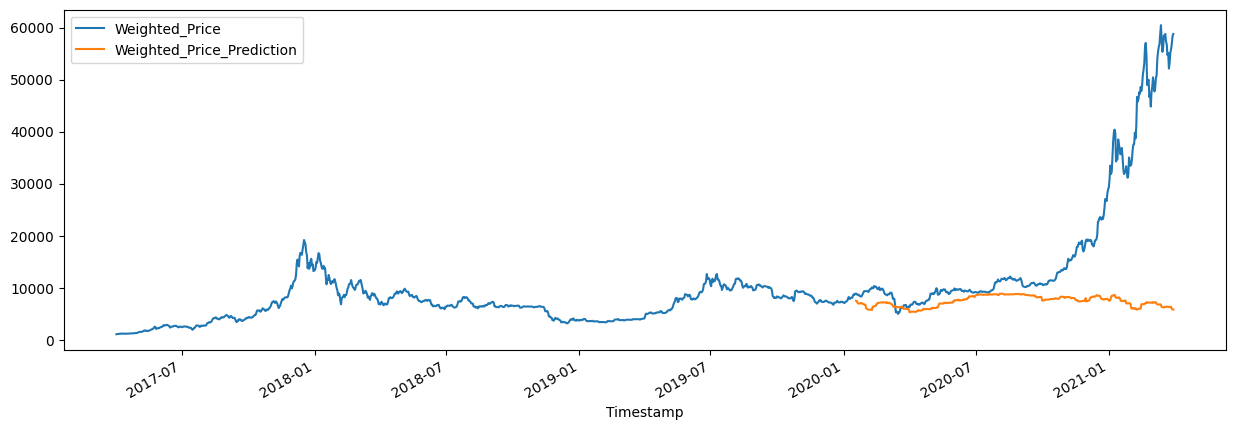

In [66]:
data_all[['Weighted_Price','Weighted_Price_Prediction']].plot(figsize=(15, 5))

In [67]:
rmse = np.sqrt(mean_squared_error(data_test['Weighted_Price'], data_test['Weighted_Price_Prediction']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 18463.149


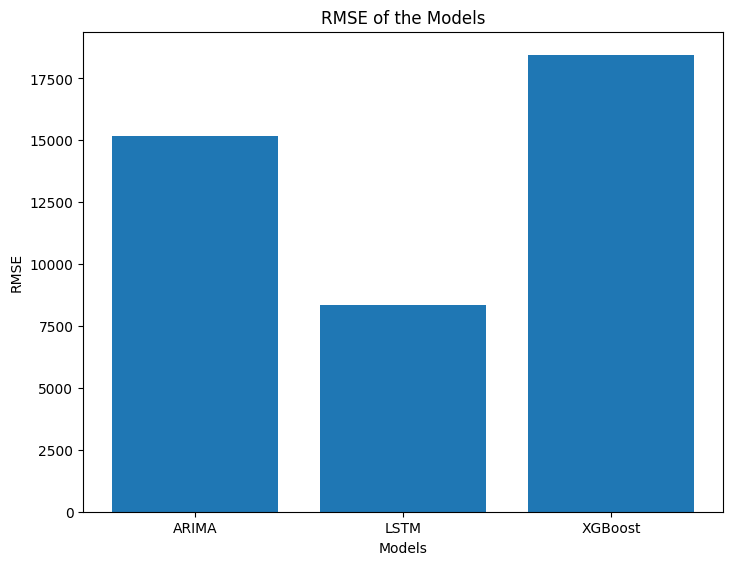

In [76]:
# Final graph for the RMSE's of each model
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
modelz = [ 'ARIMA', 'LSTM', 'XGBoost']
nums = [15171.040,8348.338, 18463.149]
ax.bar(modelz,nums)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE of the Models')
plt.show()
plt.show()